In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [14]:
df = pd.read_csv("./data/bakrep-export-aureus.tsv",sep = "\t",low_memory=False)

In [15]:
df.head()

,#id,bakta.genome.genus,bakta.genome.species,bakta.genome.strain,bakta.stats.no_sequences,bakta.stats.size,bakta.stats.gc,bakta.stats.n_ratio,bakta.stats.n50,bakta.stats.coding_ratio,...,metadata.location,metadata.project_name,metadata.sample_alias,metadata.secondary_sample_accession,metadata.secondary_study_accession,metadata.serotype,metadata.serovar,metadata.strain,metadata.study_accession,metadata.submission_accession
0,SAMD00006357,Staphylococcus,aureus,unknown,92,2766258,0.327385,0.0,97486,0.840740,...,NaN,NaN,SAMD00006357,DRS013787,DRP001363,NaN,NaN,NaN,PRJDB2070,DRA001292
1,SAMD00009488,Staphylococcus,aureus,unknown,573,2782254,0.326929,0.0,9156,0.743907,...,NaN,NaN,SAMD00009488,DRS015697,DRP002237,NaN,NaN,NaN,PRJDB1667,DRA002159
2,SAMD00009489,Staphylococcus,aureus,unknown,577,2872920,0.326815,0.0,8419,0.754526,...,NaN,NaN,SAMD00009489,DRS015698,DRP002237,NaN,NaN,NaN,PRJDB1667,DRA002159
3,SAMD00009490,Staphylococcus,aureus,unknown,503,2691639,0.327196,0.0,9105,0.753533,...,NaN,NaN,SAMD00009490,DRS015700,DRP002237,NaN,NaN,NaN,PRJDB1667,DRA002159
4,SAMD00009491,Leuconostoc,citreum,unknown,543,2672542,0.328131,0.0,8461,0.738899,...,NaN,NaN,SAMD00009491,DRS015694,DRP002237,NaN,NaN,NaN,PRJDB1667,DRA002159


In [16]:
df.columns

Index(['#id', 'bakta.genome.genus', 'bakta.genome.species',
       'bakta.genome.strain', 'bakta.stats.no_sequences', 'bakta.stats.size',
       'bakta.stats.gc', 'bakta.stats.n_ratio', 'bakta.stats.n50',
       'bakta.stats.coding_ratio', 'gtdbtk.classification.domain',
       'gtdbtk.classification.phylum', 'gtdbtk.classification.class',
       'gtdbtk.classification.order', 'gtdbtk.classification.family',
       'gtdbtk.classification.genus', 'gtdbtk.classification.species',
       'mlst.sequence_type', 'checkm2.quality.completeness',
       'checkm2.quality.contamination', 'metadata.accession',
       'metadata.collected_by', 'metadata.collection_date', 'metadata.country',
       'metadata.host', 'metadata.host_sex', 'metadata.host_status',
       'metadata.host_tax_id', 'metadata.instrument_model',
       'metadata.instrument_platform', 'metadata.isolate',
       'metadata.isolation_source', 'metadata.location',
       'metadata.project_name', 'metadata.sample_alias',
       'meta

In [17]:
df[['gtdbtk.classification.species','bakta.stats.size']]

,gtdbtk.classification.species,bakta.stats.size
0,Staphylococcus aureus,2766258
1,Staphylococcus aureus,2782254
2,Staphylococcus aureus,2872920
3,Staphylococcus aureus,2691639
4,Staphylococcus aureus,2672542
...,...,...
47717,Staphylococcus aureus,2897701
47718,Staphylococcus aureus,2882847
47719,Staphylococcus aureus,2841214
47720,Staphylococcus aureus,2885291


<Axes: title={'center': 'bakta.stats.size'}, xlabel='gtdbtk.classification.species'>

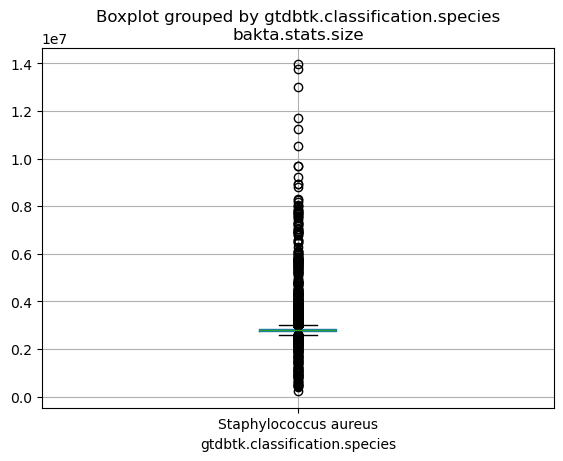

In [18]:
df.boxplot(column='bakta.stats.size', by='gtdbtk.classification.species')

<Axes: >

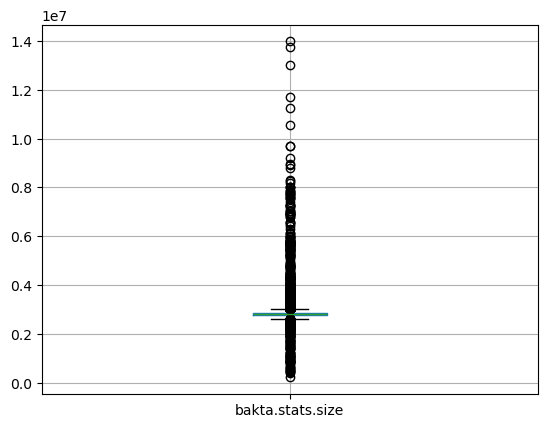

In [7]:
df.boxplot(column='bakta.stats.size')

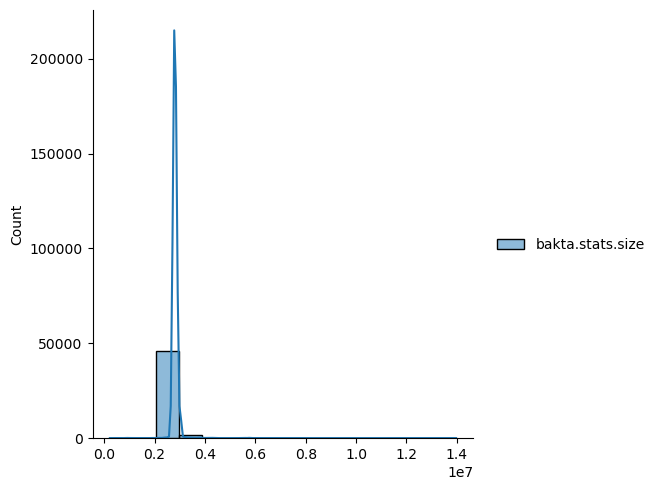

In [8]:
import seaborn as sns
sns.displot(df[['bakta.stats.size']], kde=True, bins=15)

In [9]:
def firstFit(weight, n, c):
    
    # Initialize result (Count of bins)
    res = 0
    
    # Create an array to store remaining space in bins
    # there can be at most n bins
    bin_rem = [0]*n
    
    # Place items one by one
    for i in range(n):
      
        # Find the first bin that can accommodate
        # weight[i]
        j = 0
        while( j < res):
            if (bin_rem[j] >= weight[i]):
                bin_rem[j] = bin_rem[j] - weight[i]
                break
            j+=1
            
        # If no bin could accommodate weight[i]
        if (j == res):
            bin_rem[res] = c - weight[i]
            res= res+1
    return res

In [10]:
weight = list(df['bakta.stats.size'].values)
n = len(weight)
c = 3000000000

In [11]:
firstFit(weight, n, c)

45

In [49]:
import prtpy

In [59]:
capacity = 256000000

In [80]:
bins =  prtpy.pack(algorithm=prtpy.packing.first_fit, binsize=capacity, items=weight)

In [81]:
len(bins)

528

In [82]:
res_ff =  [sum(l) for l in bins]

In [83]:
bins =  prtpy.pack(algorithm=prtpy.packing.first_fit_decreasing, binsize=capacity, items=weight)

In [84]:
len(bins)

528

In [85]:
res_ffd =  [sum(l) for l in bins]

In [86]:
df_res = pd.DataFrame((res_ffd), columns= ['first_fit_descending'])

In [87]:
df_res['first_fit'] = res_ff

In [88]:
df_res 

,first_fit_descending,first_fit
0,255993713,255874052
1,255979597,255954465
2,255986369,255999752
3,255994297,255631529
4,255990694,255967956
...,...,...
523,255403974,255990019
524,254890150,255977913
525,254053862,254480125
526,255998267,253563541


In [94]:
greedy = prtpy.partition(algorithm=prtpy.partitioning.greedy, numbins=528, items=weight, outputtype=prtpy.out.Sums)

In [95]:
greedy

[254906461.0,
 254701932.0,
 254002591.0,
 255551840.0,
 255134357.0,
 254450864.0,
 253699034.0,
 253691010.0,
 255754919.0,
 255788806.0,
 255771420.0,
 255667057.0,
 255189649.0,
 255150155.0,
 255075674.0,
 254922976.0,
 254916784.0,
 254893283.0,
 254783063.0,
 254731420.0,
 254714107.0,
 254707325.0,
 254682018.0,
 254631084.0,
 254618403.0,
 254591278.0,
 254565654.0,
 254509419.0,
 254496694.0,
 254465118.0,
 254434041.0,
 254332077.0,
 254227292.0,
 254225762.0,
 254217604.0,
 254195916.0,
 254174501.0,
 254111887.0,
 254000627.0,
 253992407.0,
 253990363.0,
 253932391.0,
 253917490.0,
 253900801.0,
 253900825.0,
 253889384.0,
 253887289.0,
 253867908.0,
 253862654.0,
 253803263.0,
 253794924.0,
 253609811.0,
 253609404.0,
 253589925.0,
 254019286.0,
 254402710.0,
 255427164.0,
 255888824.0,
 255943777.0,
 255922755.0,
 255897893.0,
 255894012.0,
 255867580.0,
 255846888.0,
 255835477.0,
 255771805.0,
 255762910.0,
 255744596.0,
 255703974.0,
 255686188.0,
 255684754.0,
 25568

In [96]:
len(greedy)

528